# Optimize

**Table of contents**<a id='toc0_'></a>    
- 1. [Algorithm 1: Simple loops](#toc1_)    
- 2. [Algorithm 2: Use monotonicity](#toc2_)    
- 3. [Algorithm 3: Call a solver](#toc3_)    
- 4. [Indifference curves](#toc4_)    
- 5. [Advanced: A classy solution](#toc5_)    
  - 5.1. [Jeppe](#toc5_1_)    
  - 5.2. [Mette](#toc5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Most economic models contain optimizing agents solving a constrained optimization problem. 

Solving a numerical optimization problems can be done using algorithms. 

And also using the module **optimize** from **[scipy](https://scipy.org/)**.

- **scipy-optimize**: [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html)

## 1. <a id='toc1_'></a>[Algorithm 1: Simple loops](#toc0_)

Consider an economic optimization problem:

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1},x_{2}}u(x_{1},x_{2})\\
 & \text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq I,\,\,\,p_{1},p_{2},I>0\\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Idea:** Loop through a grid of $N_1 \times N_2$ hypothetical solutions.  
This is the same as solving:
$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1}\in X_1,x_{2} \in X_2} x_1^{\alpha}x_2^{1-\alpha}\\
 & \text{s.t.}\\
 X_1 & = \left\{0,\frac{1}{N_1-1}\frac{I}{p_1},\frac{2}{N_1-1}\frac{I}{p_1},\dots,\frac{I}{p_1}\right\} \\
 X_2 & = \left\{0,\frac{1}{N_2-1}\frac{I}{p_2},\frac{2}{N_2-1}\frac{ I}{p_2},\dots,\frac{ I}{p_2}\right\} \\
p_{1}x_{1}+p_{2}x_{2} & \leq I\\
\end{aligned}
$$
Where we used the budget constraint to create the **grids** $X_1$ and $X_2$

In the module **grid_solve.py**, we have functions doing that.  
We must **import** those functions before using them in the notebook.   
First 2 lines ensures that we automatically load changes to any file while editing (**aalways add this**).  
Next we load all functions from `grid_solve` (`*` means get all in general)

In [1]:
# Ensures automatic reloading of module
%load_ext autoreload 
%autoreload 2
# Import all functions from module "grid_solve" 
from grid_solve import * 

In [2]:
# Numpy and plotting packages
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt # baseline module
from mpl_toolkits.mplot3d import Axes3D # for 3d figures

from matplotlib import cm # for colormaps
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

In [3]:
def u_func(x1,x2,alpha=0.50):
    return x1**alpha * x2**(1-alpha)

Go to `grid_solve` and inspect the function `find_best_choice`. It implements the algo above.   

In [4]:
# Call function and see output
sol = find_best_choice(alpha=0.25,I=10,p1=1,p2=2,N1=500,N2=400,do_print=True)
# See printed result below 

x1 = 2.5050
x2 = 3.7469
u  = 3.3881
I-p1*x1-p2*x2 = 0.00125564
x1*p1/I = 0.2505


**Plot the solution:**

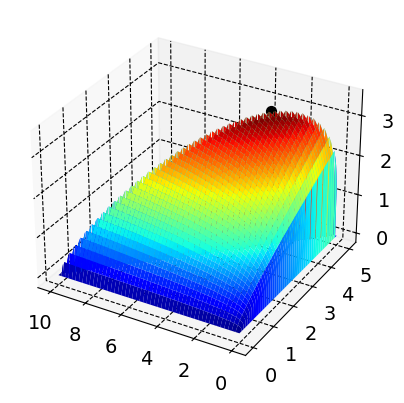

In [5]:
#%matplotlib widget
# a. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol

# b. setup figure
fig = plt.figure(dpi=100,num='')
ax = fig.add_subplot(1,1,1,projection='3d')

# c. plot 3d surface of utility values for different choices
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)

ax.invert_xaxis()

# d. plot optimal choice
ax.scatter(x1_best,x2_best,u_best,s=50,color='black');

#%matplotlib inline

**Question:** If you comment out the ax.invert_xaxis(), you'll see that u=0 for many of the combinations of $x_1$ and $x_2$, why is that? 

**Task**: Can you find a better solution with higher utility and lower left-over income, $I-p_1 x_1-p_2 x_2$?

In [6]:
# write your code here
# sol = find_best_choice()

**Hint:** think of $N$

## 2. <a id='toc2_'></a>[Algorithm 2: Use monotonicity](#toc0_)

**Better idea:** Loop through a grid of $N$ possible solutions for $x_1$ and assume the remainder is spent on $x_2$.   
This is the same as solving:

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1}\in X_1} x_1^{\alpha}x_2^{1-\alpha}\\
 \text{s.t.}\\
 X_1 & = \left\{0,\frac{1}{N-1}\frac{}{p_1},\frac{2}{N-1}\frac{I}{p_1},\dots,\frac{I}{p_1}\right\} \\
x_{2} & = \frac{I-p_{1}x_{1}}{p_2}\\
\end{aligned}
$$

Function doing just this is `find_best_choice_monotone` in `grid_solve.py`

In [7]:
# a. Calling the algo using monotonicity
sol_monotone = find_best_choice_monotone(alpha=0.25,I=10,p1=1,p2=2,N=1000)

# b. unpack solution
x1_best,x2_best,u_best,x1_values,x2_values,u_values = sol_monotone

x1 = 2.5025
x2 = 3.7487
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000
x1*p1/I = 0.2503


Plot the solution:

In [8]:

# a. create the figure
fig = plt.figure(figsize=(10,4))# figsize is in inches...

# b. left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(x1_values,u_values)
ax_left.scatter(x1_best,u_best) # Add the solution as a dot

ax_left.set_title('value of choice, $u(x_1,x_2)$')
ax_left.set_xlabel('$x_1$')
ax_left.set_ylabel('$u(x_1,(I-p_1 x_1)/p_2)$')


# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(x1_values,x2_values)
ax_right.scatter(x1_best,x2_best)

ax_right.set_title('implied $x_2$ as function of $x_1$')
ax_right.set_xlabel('$x_1$')
ax_right.set_ylabel('$x_2$')

plt.close(fig) # (Suppress print to fit slides) 

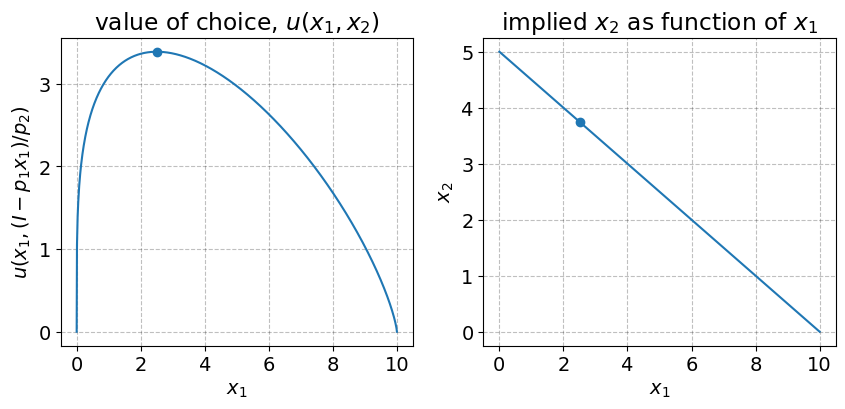

In [9]:
#Show figures of solution
fig

## 3. <a id='toc3_'></a>[Algorithm 3: Call a solver](#toc0_)


- **scipy-optimize**: [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html)

In [10]:
# Now we use the library scipy to do the heavy lifting
from scipy import optimize

Choose paramters for economic model:

In [11]:
alpha = 0.25 # preference parameter
I = 10 # income
p1 = 1 # price 1
p2 = 2 # price 2

**Case 1**: Scalar solver using monotonicity.  
Note that we are calling a **minimizer**. Take **negative** of utility.  
Recall that we if we spend everything on good one, we get $x_1 = I/p_1$. 

In [12]:
# a. objective function (to minimize)
def value_of_choice(x1,alpha,I,p1,p2):
    x2 = (I-p1*x1)/p2
    return -u_func(x1,x2,alpha)

# b. call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,
    method='bounded',
    bounds=(0,I/p1),
    args=(alpha,I,p1,p2)) # Notice the use of a tuple here

# c. unpack solution
x1 = sol_case1.x
x2 = (I-p1*x1)/p2
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.5000
x2 = 3.7500
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000
x1*p1/I = 0.2500


**Case 2**: **Multi-dimensional constrained** solver, the *SLSQP*.

In [13]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    # note: x is a array, but u_func takes scalars.
    return -u_func(x[0],x[1],alpha)

# b. constraints (violated if negative) and bounds. x is an array.
constraints = ({'type': 'ineq', 'fun': lambda x:  I-p1*x[0]-p2*x[1]})
bounds = ((0,I/p1),(0,I/p2))

# c. call solver, use SLSQP
initial_guess = [I/p1/2,I/p2/2]

sol_case2 = optimize.minimize(
    value_of_choice, initial_guess, args=(alpha,I,p1,p2),
    method='SLSQP', bounds=bounds, constraints=constraints)

# d. unpack solution
x1 = sol_case2.x[0]
x2 = sol_case2.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.4994
x2 = 3.7503
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000
x1*p1/I = 0.2499


**Case 3**: Multi-dimensional unconstrained solver with constrains implemented via penalties.

In [14]:
# a. objective function (to minimize)
def value_of_choice(x,alpha,I,p1,p2):
    
    # i. unpack
    x1 = x[0]
    x2 = x[1]
    
    # ii. penalty
    penalty = 0
    E = p1*x1+p2*x2 # total expenses
    if E > I: # expenses > income -> not allowed
        fac = I/E # fac < 1 if too high expenses
        penalty += 1000*(E-I) # calculate penalty        
        x1 *= fac # force E = I
        x2 *= fac # force E = I
        
    return -u_func(x1,x2,alpha) + penalty

In [15]:
# b. call solver
initial_guess = [I/p1/2,I/p2/2]
sol_case3 = optimize.minimize(
    value_of_choice,initial_guess,method='Nelder-Mead',
    args=(alpha,I,p1,p2))

# c. unpack solution
x1 = sol_case3.x[0]
x2 = sol_case3.x[1]
u = u_func(x1,x2,alpha)
print_solution(x1,x2,u,I,p1,p2)

x1 = 2.5000
x2 = 3.7500
u  = 3.3885
I-p1*x1-p2*x2 = 0.00000000
x1*p1/I = 0.2500


## 4. <a id='toc4_'></a>[Indifference curves](#toc0_)

Remember that the indifference curve through the point $(y_1,y_2)$ is given by the set of $x_1,x_2$ points

$$
\big\{(x_1,x_2) \in \mathbb{R}^2_+ \,|\, u(x_1,x_2) = u(y_1,y_2)\big\}
$$

To find the indifference curve: 
* fix a grid for $x_2$
* then find the corresponding $x_1$ which solves $u(x_1,x_2) = u(y_1,y_2)$ for each value of $x_2$.

In [16]:
def objective(x1,x2,alpha,u):
    return u_func(x1,x2,alpha) - u 
    # = 0 then on indifference curve with utility = u

In [17]:
def find_indifference_curve(y1,y2,alpha,N,x2_max):
    
    # a. utility in (y1,y2)
    u_y = u_func(y1,y2,alpha)
    
    # b. allocate numpy arrays
    x1_vec = np.empty(N)
    x2_vec = np.linspace(1e-8,x2_max,N)
    
    # c. loop through x2
    for i,x2 in enumerate(x2_vec):

        x1_guess = 0 # initial guess
        sol = optimize.root(objective, x1_guess, args=(x2,alpha,u_y)) 
        # optimize.root -> solve objective = 0 starting from x1 = x1_guess
        
        x1_vec[i] = sol.x[0]
    
    return x1_vec,x2_vec

Find and plot an inddifference curve:

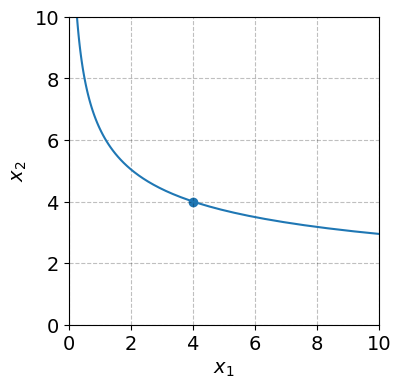

In [18]:
# a. find indifference curve through (4,4) for x2 in [0,10]
x2_max = 10
y1 = 4
y2 = 4
x1_vec,x2_vec = find_indifference_curve(y1,y2,alpha=0.25,N=100,x2_max=x2_max) 

# b. plot inddifference curve
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,x2_vec)
ax.scatter(y1,y2)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim([0,x2_max])
ax.set_ylim([0,x2_max]);


**Task:** Find the indifference curve through $x_1 = 15$ and $x_2 = 3$ with $\alpha = 0.5$.

In [19]:
# write your code here

''

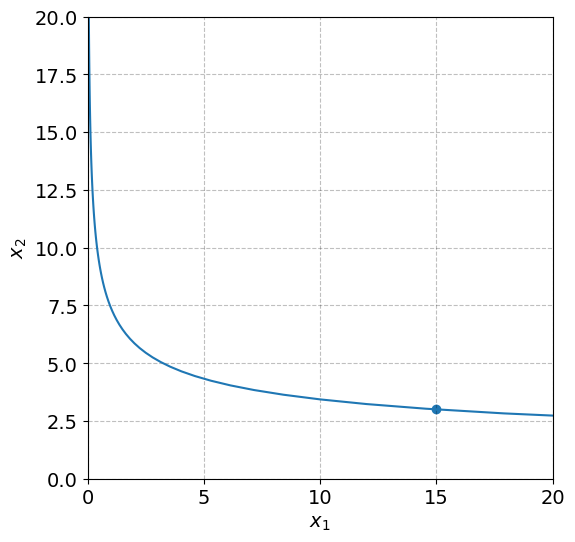

In [27]:
x2_max = 20 
y1 = 15
y2 = 3
x1_vec,x2_vec = find_indifference_curve(y1,y2,alpha=0.25,N=100,x2_max=x2_max) 



fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,x2_vec)
ax.scatter(y1,y2)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xlim([0,x2_max])
ax.set_ylim([0,x2_max])
;

## 5. <a id='toc5_'></a>[Advanced: A classy solution](#toc0_)

> **Note:** This section is advanced due to the use of a module with a class. It is, however, a good example of how to structure code for solving and illustrating a model.

**Load module** (consumer_module.py in the same folder as this notebook).

In [21]:
from consumer_module import consumer

### 5.1. <a id='toc5_1_'></a>[Jeppe](#toc0_)

Give birth to a consumer called **jeppe**:

In [22]:
jeppe = consumer() # create an instance of the consumer class called jeppe
print(jeppe)

alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000



Solve **jeppe**'s problem.

In [23]:
jeppe.solve()
print(jeppe)

alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 5.00
 x2 = 2.50



### 5.2. <a id='toc5_2_'></a>[Mette](#toc0_)

Create a new consumer, called Mette, and solve her problem.

In [24]:
mette = consumer(alpha=0.25)
mette.solve()
mette.find_indifference_curves()
print(mette)

alpha = 0.250
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 2.50
 x2 = 3.75



Make an illustration of Mette's problem and it's solution:

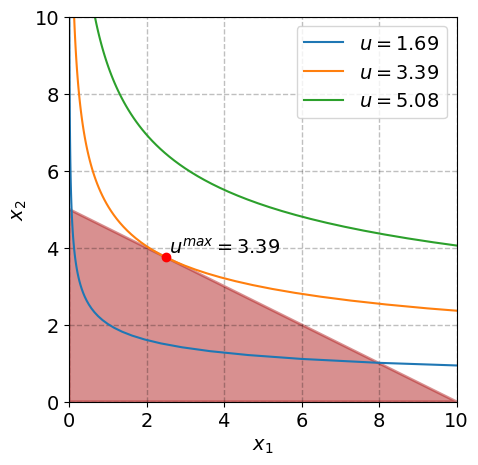

In [25]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

mette.plot_indifference_curves(ax)
mette.plot_budgetset(ax)
mette.plot_solution(ax)
mette.plot_details(ax)

**Advanced note:** Looking at the code behind the consumer class, you'll notice the 'self' argument a lot. This argument links the functions in the class definition, which holds all the instructions for behavior, and the specific object. And exactly because 'self' is the first argument in class functions, one can actually call the general class and provide it with the object one wants to evaluate a function on. 

In [26]:
# Example: 
christian = consumer()

# Calling the consumer class function and providing the object christian :
consumer.solve(christian)
print('call to consumer class: \n',christian)

# is the same as the call to the christian object directly
christian.solve()
print('call to the object christian directly: \n',christian)

call to consumer class: 
 alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 5.00
 x2 = 2.50

call to the object christian directly: 
 alpha = 0.500
price vector = (p1,p2) = (1.000,2.000)
income = I = 10.000
solution:
 x1 = 5.00
 x2 = 2.50

